In [90]:
import pandas as pd
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
delta_correlation_df = pd.read_csv('delta_correlation_df.csv')

all_profiles = []
for cancer in pd.unique(delta_correlation_df.Cancer):
    cancer_df = delta_correlation_df[delta_correlation_df.Cancer == cancer]
    background_genes  = list(pd.unique(cancer_df.Gene))
    cancer_df = cancer_df[cancer_df.FDR < 0.05]
    sig_genes  = list(pd.unique(cancer_df.Gene))
    
    cancer_profile = gp.profile(organism='hsapiens', query = sig_genes, no_iea=True, sources = ["KEGG"],
                       ordered=True, no_evidences=False, background= background_genes)
    all_profiles.append(cancer_profile)

In [102]:
all_profiles[4].head(30)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,intersections,evidences
0,KEGG,KEGG:02010,ABC transporters,9.460157e-28,True,ABC transporters,29,27,15,9998,0.555556,0.517241,query_1,[KEGG:00000],"[ABCA1, ABCA12, ABCA3, ABCB10, ABCB6, ABCB7, A...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
1,KEGG,KEGG:00071,Fatty acid degradation,1.086039e-18,True,Fatty acid degradation,36,222,19,9998,0.085586,0.527778,query_1,[KEGG:00000],"[ACAA2, ACADL, ACADM, ACADS, ACADSB, ACADVL, A...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
2,KEGG,KEGG:01212,Fatty acid metabolism,1.042540e-13,True,Fatty acid metabolism,45,85,13,9998,0.152941,0.288889,query_1,[KEGG:00000],"[ACAA2, ACACA, ACADL, ACADM, ACADS, ACADSB, AC...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
3,KEGG,KEGG:01100,Metabolic pathways,1.671366e-12,True,Metabolic pathways,1041,253,86,9998,0.339921,0.082613,query_1,[KEGG:00000],"[AACS, AADAT, AASS, ABAT, ACAA2, ACACA, ACAD8,...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
4,KEGG,KEGG:00280,"Valine, leucine and isoleucine degradation",1.432813e-10,True,"Valine, leucine and isoleucine degradation",47,222,14,9998,0.063063,0.297872,query_1,[KEGG:00000],"[AACS, ABAT, ACAA2, ACAD8, ACADM, ACADS, ACADS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
5,KEGG,KEGG:00620,Pyruvate metabolism,1.997418e-09,True,Pyruvate metabolism,38,222,13,9998,0.058559,0.342105,query_1,[KEGG:00000],"[ACACA, ACAT1, ACSS1, ACSS2, ACYP2, ADH1B, ADH...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
6,KEGG,KEGG:00640,Propanoate metabolism,5.298915e-08,True,Propanoate metabolism,30,89,8,9998,0.089888,0.266667,query_1,[KEGG:00000],"[ABAT, ACACA, ACADS, ACAT1, ACOX3, ACSS1, ACSS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
7,KEGG,KEGG:00010,Glycolysis / Gluconeogenesis,2.867268e-07,True,Glycolysis / Gluconeogenesis,54,225,13,9998,0.057778,0.240741,query_1,[KEGG:00000],"[ACSS1, ACSS2, ADH1B, ADH1C, ADH5, ADH7, ALDH1...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
8,KEGG,KEGG:04146,Peroxisome,2.941857e-06,True,Peroxisome,64,85,9,9998,0.105882,0.140625,query_1,[KEGG:00000],"[ABCD1, ABCD3, ABCD4, ACOT8, ACOX2, ACOX3, ACS...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."
9,KEGG,KEGG:00410,beta-Alanine metabolism,1.404711e-05,True,beta-Alanine metabolism,24,292,9,9998,0.030822,0.375000,query_1,[KEGG:00000],"[ABAT, ACADS, ACOX3, ALDH1B1, ALDH2, ALDH3A2, ...","[[KEGG], [KEGG], [KEGG], [KEGG], [KEGG], [KEGG..."


In [103]:
sps = ['ABC transporters',
 'Fatty acid degradation',
 'Metabolic pathways',
 'Fatty acid metabolism',
 'Pyruvate metabolism',
 'Valine, leucine and isoleucine degradation',
 'Butanoate metabolism',
 'Glycolysis / Gluconeogenesis',
 'Lysosome',
 'Peroxisome',
 'Biosynthesis of unsaturated fatty acids',
 'Thiamine metabolism',
 'Purine metabolism',
 'Glyoxylate and dicarboxylate metabolism',
 'Tyrosine metabolism',
 'Carbon metabolism',
 'Various types of N-glycan biosynthesis',
 'Lysine degradation',
 'Chemical carcinogenesis',
 'Arginine biosynthesis',
 'Cysteine and methionine metabolism',
 'Proteasome',
 'Drug metabolism - cytochrome P450',
 'Arginine and proline metabolism',
 'Synthesis and degradation of ketone bodies',
 'Citrate cycle (TCA cycle)',
 'Pantothenate and CoA biosynthesis',
 'Oxidative phosphorylation',
 'Fructose and mannose metabolism',
 'Biosynthesis of amino acids',
 'DNA replication',
 'D-Glutamine and D-glutamate metabolism',
 'Phenylalanine metabolism',
 'Translation Factors',
 'Mitochondrial LC-Fatty Acid Beta-Oxidation',
 'Fatty Acid Beta Oxidation',
 'Fatty Acid Biosynthesis',
 'Nuclear Receptors in Lipid Metabolism and Toxicity',
 'Fatty Acid Omega Oxidation',
 'Fluoroacetic acid toxicity',
 'Statin Pathway',
 'Pregnane X Receptor pathway',
'Integrated Cancer Pathway',
 'G Protein Signaling Pathways',
 'Cytoplasmic Ribosomal Proteins',
 'Mitochondrial complex I assembly model OXPHOS system',
 'Nanoparticle triggered autophagic cell death',
 'Nanomaterial induced apoptosis',
 'Composition of Lipid Particles']

rcd = ['Antifolate resistance',
 'Autophagy - other',
 'Platinum drug resistance',
 'Complement and coagulation cascades',
 'Cholesterol metabolism',
 'p53 signaling pathway',
 'Ferroptosis',
 'Apoptosis',
 'Platelet activation',
 'Apoptosis Modulation and Signaling',
'Statin Pathway',
'Apoptosis - multiple species',
'G Protein Signaling Pathways']

ang = ['Glycerolipid metabolism',
 'Vasopressin-regulated water reabsorption',
 'Glycosaminoglycan biosynthesis - chondroitin sulfate / dermatan sulfate',
 'Hematopoietic cell lineage',
'Prostaglandin Synthesis and Regulation',
 'Complement and Coagulation Cascades',
'G Protein Signaling Pathways']

rim = ['PPAR signaling pathway',
 'Endocytosis',
 'Alanine, aspartate and glutamate metabolism',
 'Nitrogen metabolism',
 'Adipocytokine signaling pathway',
 'Cell cycle',
 'Glutathione metabolism',
 'Protein digestion and absorption',
 'Phospholipase D signaling pathway',
 'Folate biosynthesis',
 'Longevity regulating pathway',
 'RNA degradation',
 'Thermogenesis',
 'Longevity regulating pathway - multiple species',
 'Complement Activation',
 'Photodynamic therapy-induced NFE2L2 (NRF2) survival signaling',
'DNA replication',
'Statin Pathway'
'Irinotecan Pathway'
'G Protein Signaling Pathways']

iam = ['Tryptophan metabolism',
 'Fatty acid biosynthesis',
 'N-Glycan biosynthesis',
 'Glycosaminoglycan biosynthesis - chondroitin sulfate / dermatan sulfate',
 'Inositol phosphate metabolism',
 'Adherens junction',
 'Glycosphingolipid biosynthesis - lacto and neolacto series',
 'Glycosphingolipid biosynthesis - globo and isoglobo series',
 'Regulation of actin cytoskeleton'
'G Protein Signaling Pathways']

grs = ['Apoptosis - multiple species',
 'Inositol phosphate metabolism',
 'Endocrine resistance'
'G Protein Signaling Pathways']


In [104]:
d = {'sps': pd.Series(sps), 'rcd': pd.Series(rcd), 'ang' : pd.Series(ang), 'rim' : pd.Series(rim), 'iam' : pd.Series(iam), 'grs': pd.Series(grs)}





In [105]:
df = pd.DataFrame(data=d)

In [106]:
llist=[[],[],[],[],[]]
for cancer in range(5):
    for num, i in enumerate(all_profiles[cancer].description):
        if i in sps:
            llist[cancer].append('sps')
        elif i in rcd:
            llist[cancer].append('rcd')
        elif i in ang:
            llist[cancer].append('ang')
        elif i in rim:
            llist[cancer].append('rim')
        elif i in iam:
            llist[cancer].append('iam')
        elif i in grs:
            llist[cancer].append('grs')
        

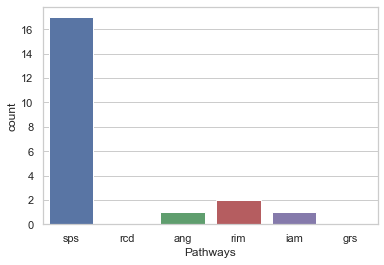

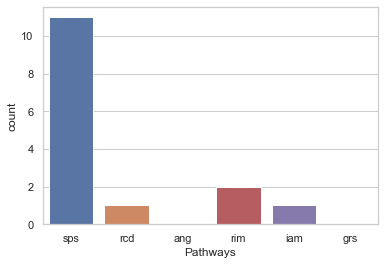

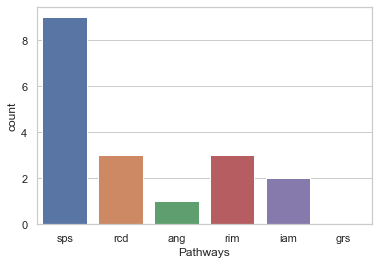

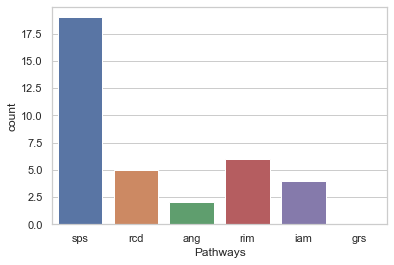

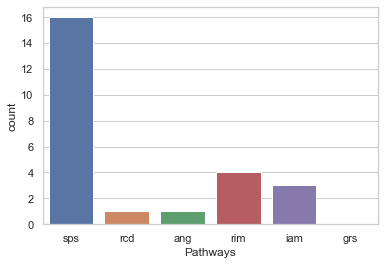

In [107]:
for n in range(5):
    ld = {'Pathways' : pd.Series(llist[n])}
    ldf = pd.DataFrame(data=llist[n])
    ldf = ldf.rename(columns={0: "Pathways"})
    sns.countplot(x ='Pathways',data=ldf, order= ['sps', 'rcd', 'ang', 'rim', 'iam','grs'])
    plt.show()